# "Book Insights: Unveiling Market Dynamics of Book Sales"

* AIM : The objective of this market study is to analyze book sales in the categories of fiction and non-fiction books over the timeline 2009-2021. The study aims to identify trends, fluctuations in market demand, sales, market composition, revenue generation from sales, and factors affecting the sales.

Saving Banner.jpg to Banner (2).jpg


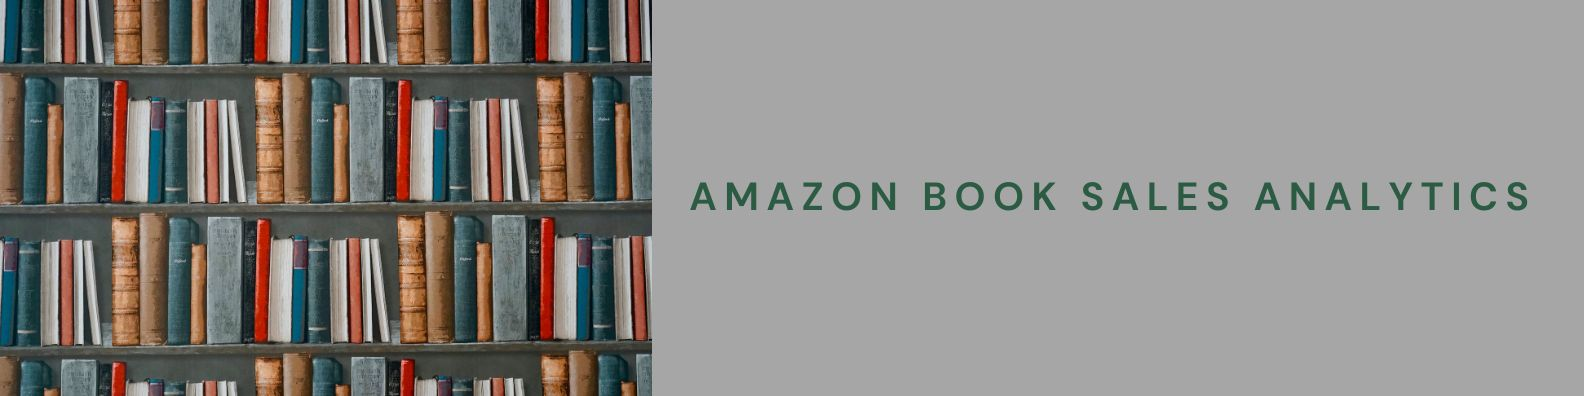

In [6]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
Image('Banner.jpg')

# Loading packages
-Import the required libraries for EDA operation.

In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Importing sales dataset
-Import the book sales dataset, convert it into data frame and display it.

In [ ]:
# Import dataset

data = pd.read_excel("C:\\Users\\Sreejith\\SalesData.xlsx")
df = pd.DataFrame(data)

# Rename columns that contains symbols($,_)

df.rename(columns={'No_of_reviews': 'Reviews'}, inplace=True)
df.rename(columns={'Cover_type': 'Type'}, inplace=True)

# Print the dataframe

print("\033[91mAmazon Top 100 Bestselling Books 2009 to 2021\033[0m")
df.head(10)

Amazon Top 100 Bestselling Books 2009 to 2021


,Serial no,Price,Ranks,Title,Reviews,Ratings,Author,Type,Year,Genre
0,0,12.49,1.0,The Lost Symbol,16118.0,4.4,Dan Brown,Hardcover,2009,Fiction
1,1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,23392.0,4.7,William P. Young,Paperback,2009,Fiction
2,2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,5036.0,4.8,Mark R. Levin,Hardcover,2009,Non Fiction
3,3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",16912.0,4.7,Stephenie Meyer,Hardcover,2009,Fiction
4,4,9.99,5.0,Going Rogue: An American Life,1572.0,4.6,Sarah Palin,Hardcover,2009,Non Fiction
5,5,18.29,6.0,StrengthsFinder 2.0,7082.0,4.1,Gallup,Hardcover,2009,Non Fiction
6,6,12.66,7.0,The Help,18068.0,4.8,Kathryn Stockett,Hardcover,2009,Fiction
7,7,17.56,8.0,New Moon (The Twilight Saga),12329.0,4.7,Stephenie Meyer,Paperback,2009,Fiction
8,8,58.90,9.0,The Twilight Saga Collection,6100.0,4.7,Stephenie Meyer,Hardcover,2009,Fiction
9,9,16.04,10.0,Outliers: The Story of Success,22209.0,4.7,Malcolm Gladwell,Hardcover,2009,Non Fiction


* The dataset contains information on ten different parameters related to the top 100 bestselling books on Amazon.

* These parameters may include details such as book titles, authors, genres, prices, ratings, publication year etc.

* The dataset spans a time series from the year 2009 to 2021, capturing the changes and trends in the sales.

# Checking for missing values
-Display all column names.
-Look out for empty cells , null values etc in the dataset.

In [ ]:
# Check for missing values

print("\033[91mInformation about the dataset\033[0m")
print("\n")
df.info()

Information about the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Serial no  1291 non-null   int64  
 1   Price      1287 non-null   float64
 2   Ranks      1287 non-null   float64
 3   Title      1286 non-null   object 
 4   Reviews    1287 non-null   float64
 5   Ratings    1287 non-null   float64
 6   Author     1286 non-null   object 
 7   Type       1286 non-null   object 
 8   Year       1291 non-null   int64  
 9   Genre      1288 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 101.0+ KB


* The dataset contains columns that have missing values that needs to be handled.

* We can see that 34 data have missing values.

* The 'year' column has no missing values.

# Handling missing values
-Dropping the rows that contain empty cells.

In [ ]:
# Drop the rows containing empty, null values

df.dropna(inplace=True)
print("\033[91mDataset after cleaning\033[0m")
print("\n")
df.info()

Dataset after cleaning


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 0 to 1290
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Serial no  1285 non-null   int64  
 1   Price      1285 non-null   float64
 2   Ranks      1285 non-null   float64
 3   Title      1285 non-null   object 
 4   Reviews    1285 non-null   float64
 5   Ratings    1285 non-null   float64
 6   Author     1285 non-null   object 
 7   Type       1285 non-null   object 
 8   Year       1285 non-null   int64  
 9   Genre      1285 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 110.4+ KB


* Handled missing data and cleaned the dataset.

* This cleaned dataset is used for various analyses, such as identifying popular genres, tracking the success of specific authors, understanding pricing patterns, and exploring the relationship between ratings and sales.

# Data Exploration and Summary

## Summary statistics - checking data consistency
-To know the summary statistic from selected column, helps to assess the reliability and trustworthiness of the data.
-Price, reviews, ratings columns are selected for this operation.

In [ ]:
# Max,min,average,median calculations

max_price = float(round(df['Price'].max(), 2))
max_reviews = float(round(df['Reviews'].max(), 2))
max_ratings = float(round(df['Ratings'].max(), 2))

min_price = float(round(df['Price'].min(), 2))
min_reviews = float(round(df['Reviews'].min(), 2))
min_ratings = float(round(df['Ratings'].min(), 2))

avg_price = float(round(df['Price'].mean(), 2))
avg_reviews = float(round(df['Reviews'].mean(), 2))
avg_ratings = float(round(df['Ratings'].mean(), 2))

median_price = float(round(df['Price'].median(), 2))
median_reviews = float(round(df['Reviews'].median(), 2))
median_ratings = float(round(df['Ratings'].median(), 2))

headers = ["Parameter", "Price", "Review", "Ratings"]

data = [["Mean", avg_price, "\033[91m" + str(avg_reviews) + "\033[0m", avg_ratings],
        ["Median", median_price,"\033[91m" + str(median_reviews) + "\033[0m",median_ratings],
        ["Min Value",min_price,min_reviews,min_ratings ],
        ["Max Value",max_price,max_reviews,max_ratings ]]

tabulate.PRESERVE_WHITESPACE = True
tabulate.WIDE_CHARS_MODE = False
print(tabulate(data, headers=headers, tablefmt="grid"))


+-------------+---------+----------+-----------+
| Parameter   |   Price |   Review |   Ratings |
+=============+=========+==========+===========+
| Mean        |   13.76 |  25843.8 |      4.65 |
+-------------+---------+----------+-----------+
| Median      |   12.11 |  16845   |      4.7  |
+-------------+---------+----------+-----------+
| Min Value   |    1.17 |     50   |      3.4  |
+-------------+---------+----------+-----------+
| Max Value   |  144    | 344811   |      4.9  |
+-------------+---------+----------+-----------+


-In the 'Review' variable, there is the potential for outliers based on the mean and median to be significantly different, which needs to be a concern.

In [ ]:
print(tabulate({"Parameter": ["Reviews"],"Mean": [ "\033[91m" + str(avg_reviews) + "\033[0m"],"Median":[ "\033[91m" + str(median_reviews) + "\033[0m"]},headers="keys",tablefmt="grid"))

+-------------+---------+----------+
| Parameter   |    Mean |   Median |
+=============+=========+==========+
| Reviews     | 25843.8 |    16845 |
+-------------+---------+----------+


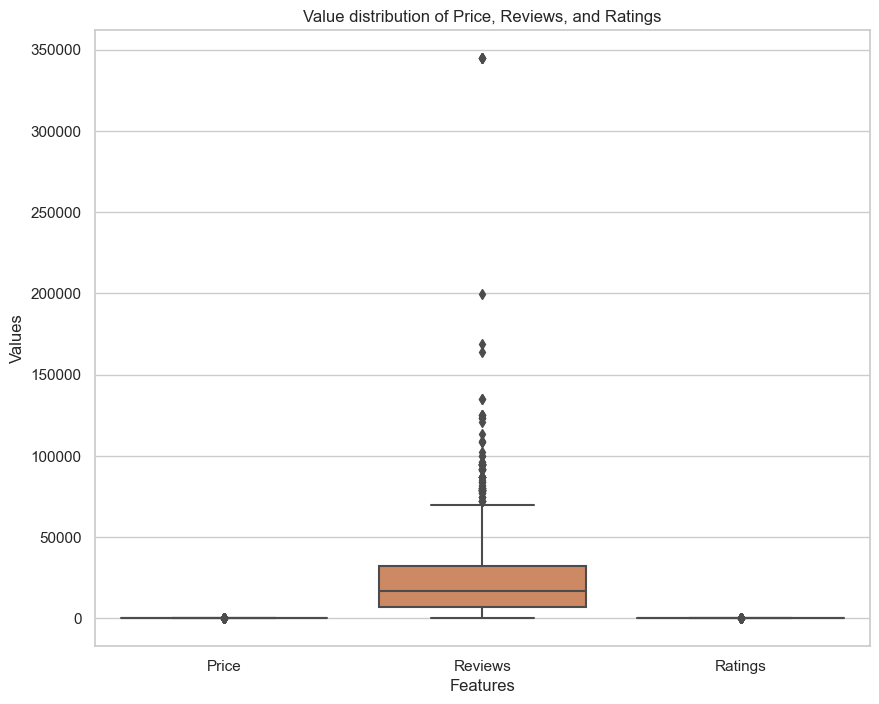

In [ ]:
# Boxplot

selected_columns = df[['Price', 'Reviews', 'Ratings']]
plt.figure(figsize=(10, 8))
sns.boxplot(data=selected_columns)
plt.title('Value distribution of Price, Reviews, and Ratings')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

* In simple terms, some review scores are much higher or much lower than the majority of the data, causing a distortion in the central tendency.

* Book reviews are written evaluations and opinions about the content, writing style, plot, characters, and overall quality of the book.

* As a result it differ from person to person based on their individual experience.

# #Market trend analysis
-To know category-wise percentage of books sold over the years (From 2009-2021)

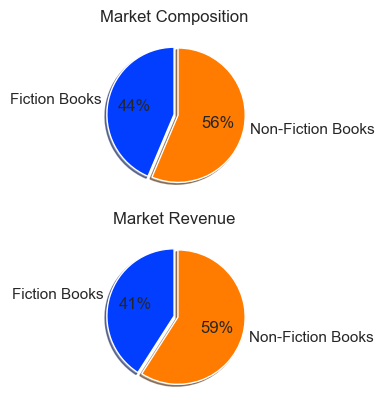

In [ ]:
# Grouping data

grouped_data = df.groupby("Genre")
fiction_book = grouped_data.get_group("Fiction")
non_fiction_book = grouped_data.get_group("Non Fiction")

# Sum,count calculation

x = fiction_book["Genre"].count()
y = non_fiction_book["Genre"].count()
a = fiction_book["Price"].sum()
b = non_fiction_book["Price"].sum()

# Percentage calculation of fiction and non-fiction

x_percent = (x/(x+y))*100
y_percent = (y/(x+y))*100
x_percent = round(x_percent,2)
y_percent = round(y_percent,2)

data = [x_percent, y_percent]
data1 = [a,b]

#  Plot 1

plt.subplot(2,1,1)
keys = ['Fiction Books', 'Non-Fiction Books']
explode = [0, 0.06]
palette_color = sns.color_palette('bright')
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%',startangle = 90,shadow = True)
plt.title("Market Composition")

# Plot 2

plt.subplot(2,1,2)
keys = ['Fiction Books', 'Non-Fiction Books']
explode = [0, 0.06]
palette_color = sns.color_palette('bright')
plt.pie(data1, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%',startangle = 90,shadow = True)
plt.title("Market Revenue")

plt.show()


* Based on the data analysis, it is evident that the fiction category constitutes 44% of the total books sold, while the non-fiction category accounts for 56%. However, despite the higher percentage of fiction books sold, they contribute to only 41% of the total revenue, whereas the non-fiction category generates the majority, representing 59% of the revenue.

* This suggests that although more fiction books are being sold, the revenue generated by non-fiction books is significantly higher. As a bookseller, it would be beneficial to focus on strategies to boost the sales of non-fiction books and capitalize on their higher revenue potential.

* This could include promoting popular non-fiction titles, curating themed displays, offering attractive deals on non-fiction books, and identifying emerging trends in the non-fiction genre.

# #Sales trend analysis
-To plot and visualize the changes in book sales over time, providing valuable insights into the reading preferences of customers and the growth of the book market.

In [ ]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

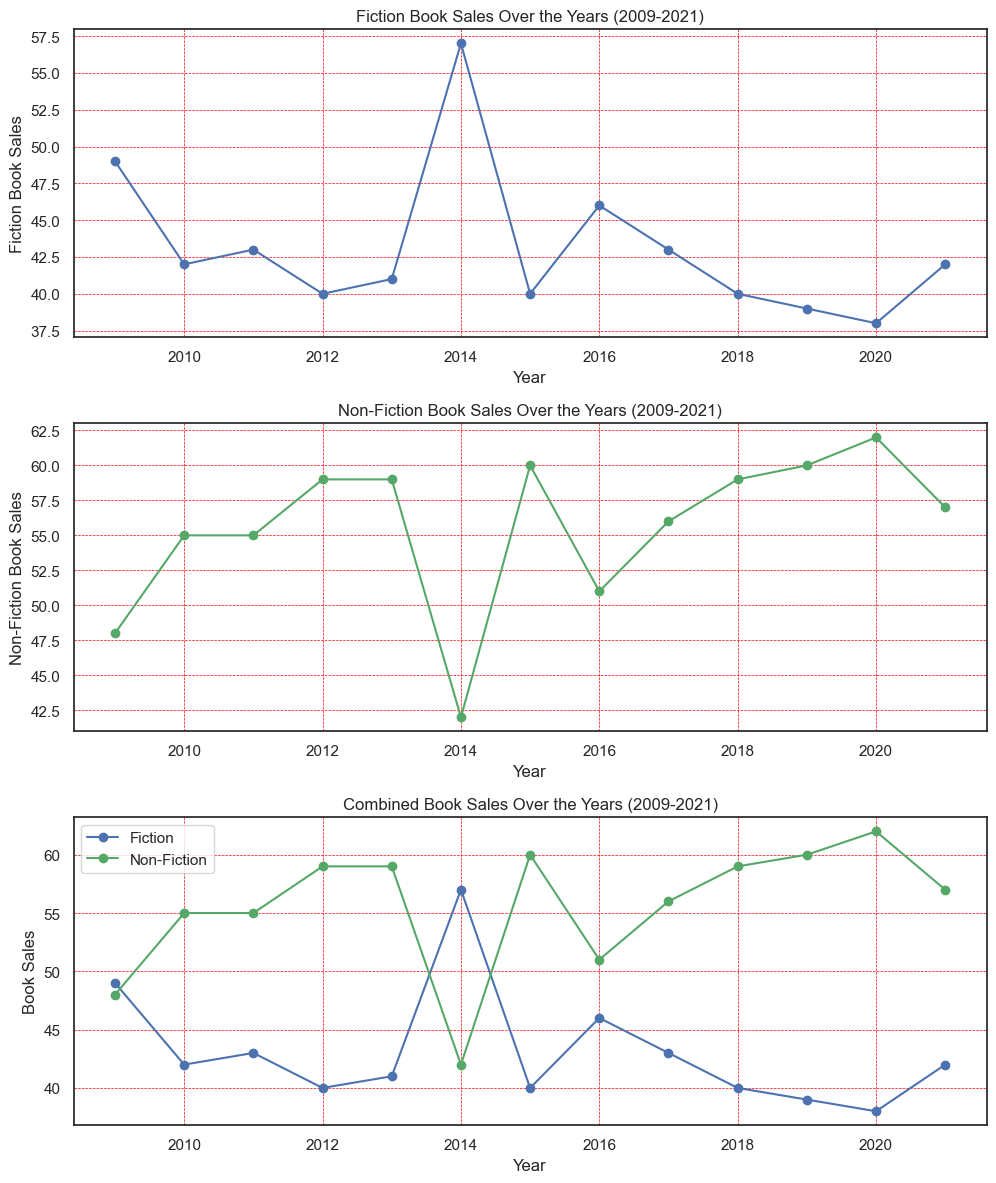

In [ ]:
# Create a new DataFrame to store the results for each year

result_df = pd.DataFrame(columns=['Year', 'Fiction', 'Non-Fiction'])

# Loop through each year from 2009 to 2021

for year in range(2009, 2022):

    # Filter the DataFrame to include only the data for the current year

    df_year = df[df['Year'] == year]

    # Group the data for the current year by 'Genre'

    sales_year = df_year.groupby('Genre')

    # Get the count of books sold in each group for the current year

    book_count_year = sales_year['Genre'].count()

    # Add the results to the 'result_df' DataFrame

    result_df = result_df.append({'Year': year, 'Fiction': book_count_year.get('Fiction', 0), 'Non-Fiction': book_count_year.get('Non Fiction', 0)}, ignore_index=True)

# Create a 3x1 grid of subplots

plt.figure(figsize=(10, 12))

# Plot 1: Fiction Book Sales Over the Years

plt.subplot(3, 1, 1)
plt.plot(result_df['Year'], result_df['Fiction'], marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Fiction Book Sales')
plt.title('Fiction Book Sales Over the Years (2009-2021)')
plt.grid(color = 'red', linestyle = '--', linewidth = 0.5)

# Plot 2: Non-Fiction Book Sales Over the Years

plt.subplot(3, 1, 2)
plt.plot(result_df['Year'], result_df['Non-Fiction'], marker='o', color='g')
plt.xlabel('Year')
plt.ylabel('Non-Fiction Book Sales')
plt.title('Non-Fiction Book Sales Over the Years (2009-2021)')
plt.grid(color = 'red', linestyle = '--', linewidth = 0.5)

# Plot 3: Combined Book Sales Over the Years

plt.subplot(3, 1, 3)
plt.plot(result_df['Year'], result_df['Fiction'], marker='o', color='b', label='Fiction')
plt.plot(result_df['Year'], result_df['Non-Fiction'], marker='o', color='g', label='Non-Fiction')
plt.xlabel('Year')
plt.ylabel('Book Sales')
plt.legend()
plt.title('Combined Book Sales Over the Years (2009-2021)')
plt.grid(color = 'red', linestyle = '--', linewidth = 0.5)

# Adjust spacing between subplots

plt.tight_layout()

# Show the plots

plt.show()



* Overall Trend: Both fiction and non-fiction book sales show an increasing trend over the years. The number of books sold in both genres has generally increased, indicating a growing interest in reading.

* Fluctuations: There are some fluctuations in the sales of both genres throughout the years. These fluctuations might be influenced by various factors such as popular book releases, changing reading preferences, and market dynamics.

* Growth Rate: The growth rate of fiction book sales seems to be slightly lower compared to non-fiction books. This suggests that readers have shown a relatively stronger preference for non-fiction books during the given period.

* Market Potential: The increasing trend in both genres indicates a promising market for both fiction and non-fiction books.   This can be an opportunity for authors, publishers, and bookstores to cater to the demand for a diverse range of books.

* Further Analysis: While the line plot provides an overview of book sales trends, further analysis can be conducted to explore the factors influencing the fluctuations and identify potential areas for targeted marketing strategies.

* Note: Based on the market analysis and sales trend analysis, it is evident that people's reading habits are more inclined towards non-fictional books, thereby generating more revenue.

# #Further analysis : Understanding fluctuations in the market
-Further analysis needs to be conducted to study the market and gain more insights.
-This part will help in understanding the reasons behind the popularity gained by non-fiction books in the market.

## Book pricing : an overview
-To analyse the average pricing of books

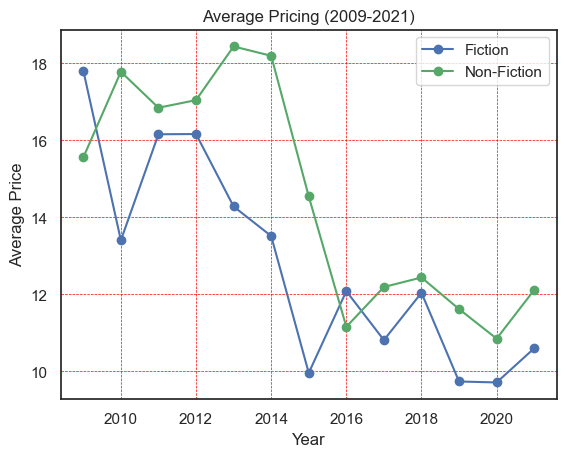

<Figure size 1000x1200 with 0 Axes>

In [ ]:
# Create a new DataFrame to store the results for each year

pricing_data1 = pd.DataFrame(columns=['Year','Price'])
pricing_data2 = pd.DataFrame(columns=['Year','Price'])

# Loop through each year from 2009 to 2021

for year in range(2009, 2022):

    # Filter the DataFrame to include only the data for the current year

    year_data = df[df['Year']==year]

    # Group the data for the current year by 'Genre'

    price_data = year_data.groupby('Genre')

    # Get the group of fiction and non-fiction books

    plot_data1 = price_data.get_group('Fiction')
    plot_data2 = price_data.get_group('Non Fiction')

    plot_data1 = plot_data1[['Year', 'Price']]
    plot_data2 = plot_data2[['Year', 'Price']]

    # Calculate mean

    mean_price1 = plot_data1['Price'].mean()
    mean_price2 = plot_data2['Price'].mean()

    # Append the year and mean price to the 'pricing_data1' DataFrame
    pricing_data1 = pricing_data1.append({'Year': year, 'Price': mean_price1}, ignore_index=True)
    pricing_data2 = pricing_data2.append({'Year': year, 'Price': mean_price2}, ignore_index=True)

# Plot the data

plt.plot(pricing_data1['Year'], pricing_data1['Price'], marker='o', color='b', label='Fiction')
plt.plot(pricing_data2['Year'], pricing_data2['Price'], marker='o', color='g', label='Non-Fiction')

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.title('Average Pricing (2009-2021)')
plt.grid(color = 'red', linestyle = '--', linewidth = 0.5)
plt.figure(figsize=(10, 12))
plt.show()

* The average prices of fictional books fluctuated over the years, with the highest average price recorded in 2009 (17.82) and the lowest in 2019 (9.74). On the other hand, non-fictional books generally had higher average prices, with the highest average price in 2013 (18.44) and the lowest in 2016 (11.16).

* The pricing trends between fictional and non-fictional books showed some variations, but there were instances where the average prices of fictional books were higher than non-fictional books (e.g., 2009 and 2010). However, overall, non-fictional books tended to have higher average prices compared to fictional books.

* The average prices of both fictional and non-fictional books seem to have relatively stabilized in recent years (from 2018 to 2021), showing less significant fluctuations compared to earlier years.

## Market insights :  Analyzing book pricing and customer feedback

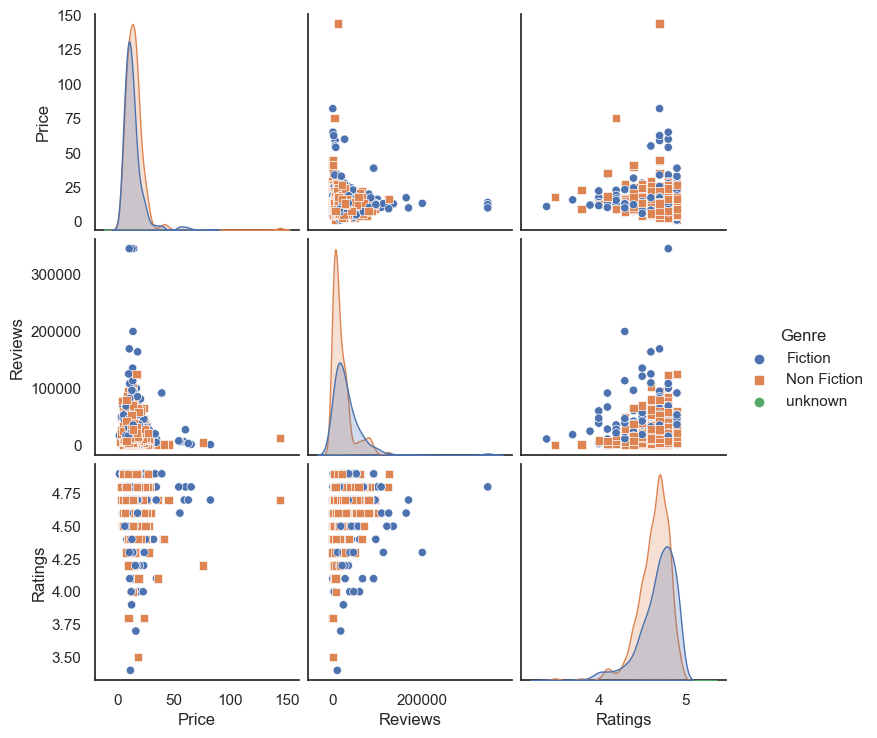

In [ ]:
# Create the pair plot

sns.set(style='white')
sns.pairplot(df, vars=['Price', 'Reviews', 'Ratings'], hue='Genre', markers=["o", "s"], diag_kind='kde')

# Display the plot

plt.show()

* Non-fiction books are more popular and preferred by readers in the market.

* The pricing difference between fiction and non-fiction books does not significantly influence the buying decision.

* Author popularity is not the main driving factor behind the success of non-fiction books, as ratings and reviews play a more significant role in shaping reader's preferences.

* The market trend indicates that readers are more inclined to choose non-fiction books due to the impact of positive reviews and higher ratings, regardless of the authors' popularity.

## Is Price really a factor affecting the sales ?
-Let's explore whether the pricing of books is a determining factor affecting their sales.

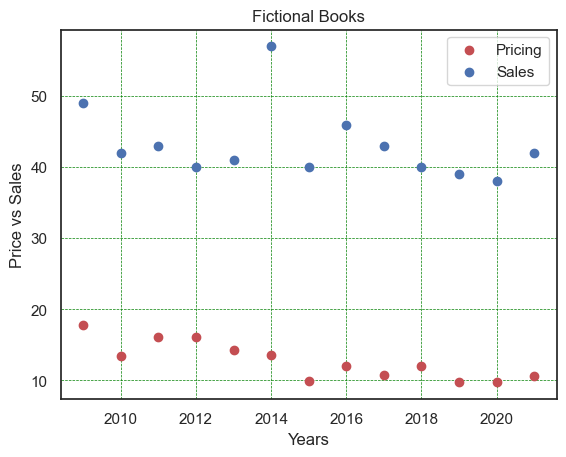

In [ ]:
# Scatter plot

plt.scatter(pricing_data1['Year'], pricing_data1['Price'], marker='o', color='r', label='Pricing')
plt.scatter(result_df['Year'], result_df['Fiction'], marker='o', color='b',label='Sales')
plt.xlabel('Years')
plt.ylabel('Price vs Sales')
plt.title("Fictional Books")
plt.legend()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()


* It is evident that the pricing of fictional book does not have a direct impact on readers.

* In recent years (2016-2021), fictional book sales have notably declined despite relatively stable pricing.

* Readers prioritize factors such as reviews, ratings, and author reputation over pricing when selecting books.

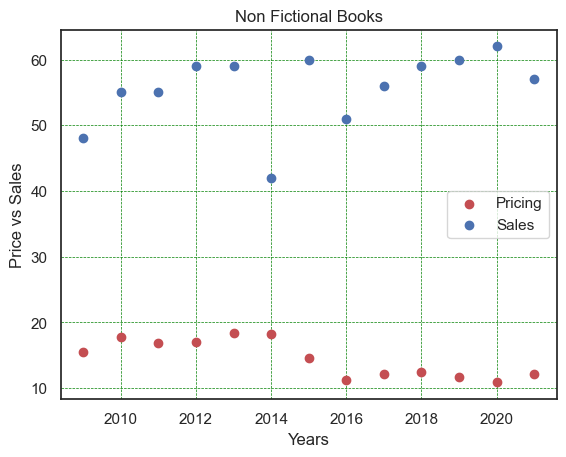

In [ ]:
# Scatter plot

plt.scatter(pricing_data2['Year'], pricing_data2['Price'], marker='o', color='r', label='Pricing')
plt.scatter(result_df['Year'], result_df['Non-Fiction'], marker='o', color='b', label='Sales')
plt.xlabel('Years')
plt.ylabel('Price vs Sales')
plt.title("Non Fictional Books")
plt.legend(loc='right')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

* It is evident that the pricing of Non-fictional book does not have a direct impact on readers.

* In recent years (2016-2021), Non-fictional book sales have notably increased.

* We should take into consideration that Non-fictional books hold a dominant position in the market, even though their pricing is relatively similar to that of fictional books.

* Readers prioritize factors such as reviews, ratings, and author reputation over pricing when selecting Non-fictional books.

* NOTE : the pricing of books does not have a direct impact on their sales. Instead, readers often consider various other factors when making purchasing decisions. Elements such as reviews, ratings, and author popularity can play a crucial role in influencing readers' choices.

# #Exploring Data Correlation: Strengthening Conclusions and Insights
-Let's see what more can be discovered from the dataset to strengthen our conclusions.

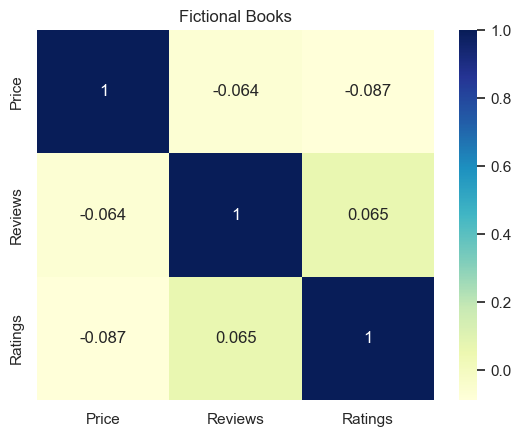

In [ ]:
fictional_data = df[df['Genre'] == 'Fiction']
non_fictional_data = df[df['Genre']=='Non Fiction']

# Select the columns of interest for correlation

selected_columns = fiction_data[['Price', 'Reviews', 'Ratings']]
select_columns = non_fictional_data[['Price', 'Reviews', 'Ratings']]

# plotting correlation heatmap

dataplot = sns.heatmap(selected_columns.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap

plt.title("Fictional Books")
plt.show()


* Pricing Strategy: The negative correlation between price and reviews/ratings suggests a trade-off between higher prices and feedback. Higher-priced fictional books may result in fewer reviews and lower ratings. Consider experimenting with pricing to strike a balance between revenue and positive feedback.

* Customer Engagement: The positive correlation between reviews and ratings emphasizes the importance of encouraging customer feedback. Engage with customers actively, urge them to leave reviews, and prioritize customer satisfaction to improve overall book ratings.

* Product Recommendations: Leverage correlations between reviews/ratings and price to identify potential best-sellers. Highlight fictional books with lower prices and higher reviews/ratings in your store and promotional campaigns to attract more buyers.

* In conclusion, optimizing the pricing of fictional books can boost sales, while actively engaging with customers and collecting user reviews can improve overall ratings. Tailoring your marketing strategies and considering genre and content preferences will contribute to the success of your fictional book sales. Continuous analysis and adaptation are crucial for staying competitive in the fictional book market.

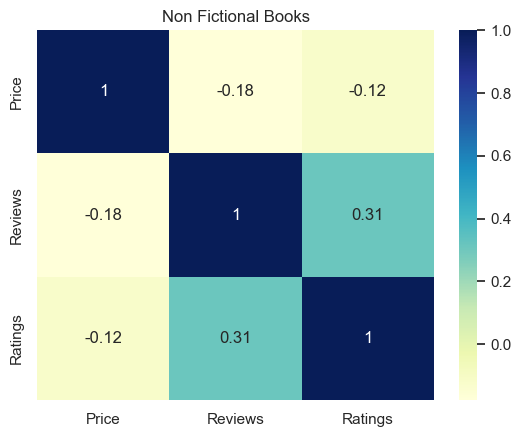

In [ ]:
# Data co-relation using heatmap

dataplot1 = sns.heatmap(select_columns.corr(), cmap="YlGnBu", annot=True)
plt.title("Non Fictional Books")
plt.show()

* Price Optimization: Since higher-priced non-fiction books seem to receive fewer reviews and slightly lower ratings, consider optimizing the pricing of non-fiction books. Finding the right balance between price and perceived value could help attract more customers and positive reviews.

* Customer Engagement: Encourage customers to leave reviews for the non-fiction books they purchase. Positive reviews not only lead to higher ratings but also serve as social proof for potential buyers. Engage with customers to build a strong community around your books.This in turn will increase in the sales of non-fictional books.

* Highlight Positive Reviews: Showcase books with a substantial number of positive reviews. Customers often rely on reviews to make purchase decisions, and highlighting well-reviewed books can improve their appeal.

* Genre and Content Consideration: Analyze the performance of different genres within non-fiction. Certain topics or subject areas might be more price-sensitive or receive more positive feedback. Understanding customer preferences can help you curate a diverse and appealing selection of non-fiction books.

* In conclusion, there is already a great revenue generation from the sales of non-fictional books.This is due to higher reviews and ratings received by non-fictional books.The key strategies to keep up this trend are also optimizing pricing, engaging with customers frequently, collecting user reviews, and tailoring marketing approaches based on genre and content preferences. Continuous analysis and adaptation are vital to remaining competitive in the non-fictional book market as well. Understanding customer preferences and delivering high-quality content will contribute to the success of your non-fictional book sales.

# #Best books recomended for the market
-Here are some of the best books that dominate the market.

In [ ]:
grouped_data = df.groupby('Genre')
fiction_group = grouped_data.get_group('Fiction')

y = fiction_group.sort_values('Ratings',ascending=False)

table_data = y[['Author', 'Title', 'Ratings','Year']].head(5)
table = tabulate(table_data, headers='keys', showindex=False, tablefmt='grid')

print("\033[91mTop 5 highest rated fictional books from 2009 to 2021 \033[0m")
print(table)

Top 5 highest rated fictional books from 2009 to 2021 
+------------------+------------------------------------------------------------------------+-----------+--------+
| Author           | Title                                                                  |   Ratings |   Year |
+==================+========================================================================+===========+========+
| J. K. Rowling    | Harry Potter Paperback Box Set (Books 1-7)                             |       4.9 |   2017 |
+------------------+------------------------------------------------------------------------+-----------+--------+
| Shel Silverstein | Every Thing On It                                                      |       4.9 |   2011 |
+------------------+------------------------------------------------------------------------+-----------+--------+
| Dav Pilkey       | Dog Man Unleashed: From the Creator of Captain Underpants (Dog Man #2) |       4.9 |   2017 |
+------------------+-----

In [ ]:
non_fiction = grouped_data.get_group('Non Fiction')

b = non_fiction.sort_values('Ratings',ascending=False)

tables = b[['Author', 'Title', 'Ratings','Year']].head(5)
tables_data = tabulate(tables, headers='keys', showindex=False, tablefmt='grid')

print("\033[91mTop 5 highest rated Non-fiction books from 2009 to 2021    : \033[0m")
print(tables_data)

Top 5 highest rated Non-fiction books from 2009 to 2021    : 
+-------------------+----------------------------------------------------------+-----------+--------+
| Author            | Title                                                    |   Ratings |   Year |
+===================+==========================================================+===========+========+
| Sally Lloyd-Jones | The Jesus Storybook Bible: Every Story Whispers His Name |       4.9 |   2013 |
+-------------------+----------------------------------------------------------+-----------+--------+
| Bill Martin Jr.   | Chicka Chicka Boom Boom (Board Book)                     |       4.9 |   2016 |
+-------------------+----------------------------------------------------------+-----------+--------+
| Sally Lloyd-Jones | The Jesus Storybook Bible: Every Story Whispers His Name |       4.9 |   2014 |
+-------------------+----------------------------------------------------------+-----------+--------+
| Alice Schertle    

# #Best authors of all time
-Let's get to know about the best authors of all time.

In [ ]:
df_sorted = df.sort_values('Ratings', ascending=False)
grouped_data = df_sorted.groupby('Ratings')
top_authors = grouped_data.head(5)

table_data = top_authors[['Author', 'Title','Genre']].head(10)
table = tabulate(table_data, headers='keys', showindex=False, tablefmt='grid')

print("\033[91mTop rated authors \033[0m")
print(table)

Top rated authors 
+-----------------------+------------------------------------------------------------------------+-------------+
| Author                | Title                                                                  | Genre       |
+=======================+========================================================================+=============+
| Emily Winfield Martin | The Wonderful Things You Will Be                                       | Fiction     |
+-----------------------+------------------------------------------------------------------------+-------------+
| Dungeons & Dragons    | D&D Player's Handbook (Dungeons & Dragons Core Rulebook)               | Fiction     |
+-----------------------+------------------------------------------------------------------------+-------------+
| Dav Pilkey            | Dog Man Unleashed: From the Creator of Captain Underpants (Dog Man #2) | Fiction     |
+-----------------------+----------------------------------------------------

* The best books in both fiction and non-fiction categories, as well as the best authors of all time, have been identified. ---Since most of the best authors have composed fictional books, these books present an excellent opportunity to increase the revenue generation in the fictional category.
* The above-discussed strategies, such as price optimization, customer engagement, highlighting positive reviews, and genre selection, need to be implemented on these books on a much larger scale.

# Conclusions

* Market Dynamics Revealed: The analysis of book sales data has provided valuable insights into the market dynamics of different book genres. By examining the pricing trends, customer engagement, and genre-specific preferences, we gained a comprehensive understanding of how the book market operates.

* Genre-Based Strategies: The study highlighted the significance of tailoring pricing and marketing strategies based on the genre. Fictional and non-fictional books exhibited distinct price trends, and understanding these patterns allowed for better positioning and promotional activities.

* Customer Sentiments Matter: By analyzing customer reviews and ratings, we identified the importance of positive customer feedback in driving sales. Engaging with readers, encouraging reviews, and addressing feedback can have a profound impact on enhancing the reputation and appeal of books.

* Competitive Edge: The study's insights empower booksellers to gain a competitive edge by making data-driven decisions. By staying attuned to market trends and understanding customer preferences, bookstores can optimize their inventory, pricing, and promotional efforts to better meet customer demands.

* Continuous Adaptation: In the dynamic world of book sales, continuous analysis and adaptation are essential for sustained  success. Monitoring market shifts, embracing emerging trends, and staying customer-focused will ensure booksellers remain resilient and responsive to changing demands.

* NOTE : Upon analyzing the sales data, we discovered a notable trend in the book market. Non-fiction books consistently outperform fictional books in terms of sales. Further investigation into the factors influencing sales revealed that pricing had minimal impact. Interestingly, readers attach greater importance to higher-rated books, author popularity, and book reviews when making purchasing decisions. As a result, non-fiction books tend to receive significantly higher ratings and reviews compared to fictional works. Overall, it is evident that reviews, ratings, and author popularity play a pivotal role in driving book sales, while the distinction between pricing in the fiction and non-fiction categories is not a significant contributing factor.The above-discussed points should be kept in mind for future sales. Taking customer feedback into account and highlighting positive reviews will prove instrumental in boosting sales. Additionally, maintaining an inventory of highly rated books and best-selling author works can lead to substantial profit gains. Understanding the factors that influence readers' decisions and aligning strategies accordingly will be key to thriving in the competitive book market.